<a href="https://colab.research.google.com/github/Fitrink/Cervical-Cancer-Using-Detection-Random-Forest/blob/main/Cervical_Cancer_Detection_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Exploratory Data Analysis (EDA)

In [ ]:
#Load Dataset
data = pd.read_csv('case-2.csv')
data

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


In [ ]:
# Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_sexualRisk         72 non-null     int64
 1   behavior_eating             72 non-null     int64
 2   behavior_personalHygine     72 non-null     int64
 3   intention_aggregation       72 non-null     int64
 4   intention_commitment        72 non-null     int64
 5   attitude_consistency        72 non-null     int64
 6   attitude_spontaneity        72 non-null     int64
 7   norm_significantPerson      72 non-null     int64
 8   norm_fulfillment            72 non-null     int64
 9   perception_vulnerability    72 non-null     int64
 10  perception_severity         72 non-null     int64
 11  motivation_strength         72 non-null     int64
 12  motivation_willingness      72 non-null     int64
 13  socialSupport_emotionality  72 non-null     int64
 14  socialSuppor

In [ ]:
# Descriptive Statistics
data.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


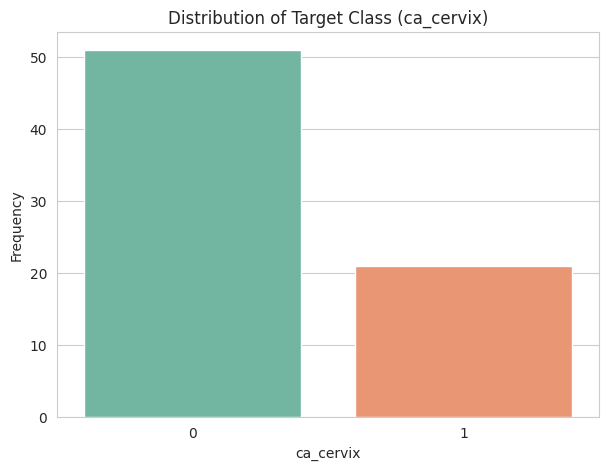

In [ ]:
# Visualize Target Distribution (ca_cervix)
plt.figure(figsize=(7,5))
sns.countplot(x='ca_cervix', data=data, palette='Set2')
plt.title('Distribution of Target Class (ca_cervix)')
plt.xlabel('ca_cervix')
plt.ylabel('Frequency')
plt.show()

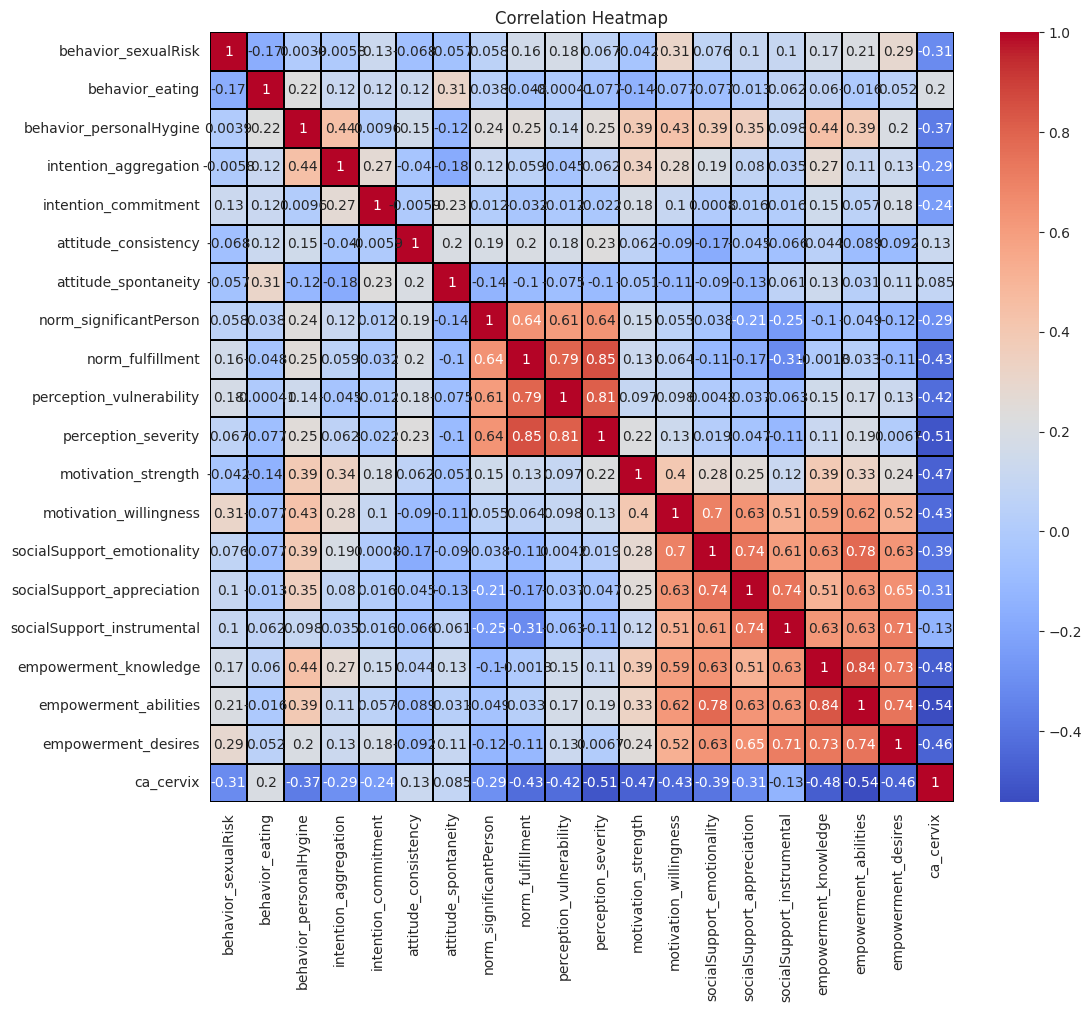

In [ ]:
# Visualizing Correlation Between Features
plt.figure(figsize=(12,10))
corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=0.2, linecolor='black', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select Features and Target
X = data.drop(columns=['ca_cervix'])  # All columns except target
y = data['ca_cervix'] # Target column
print(X.shape,y.shape)

(72, 19) (72,)


In [ ]:
# Split Data (60% Training - 40% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42529)

# Normalize Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Modeling

In [ ]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction Model
predictions = rf.predict(X_test)
print(predictions)

# Evalution Model
print("\nClassification Report:")
print(classification_report(y_test, predictions))

[1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.78      0.78      0.78         9

    accuracy                           0.86        29
   macro avg       0.84      0.84      0.84        29
weighted avg       0.86      0.86      0.86        29



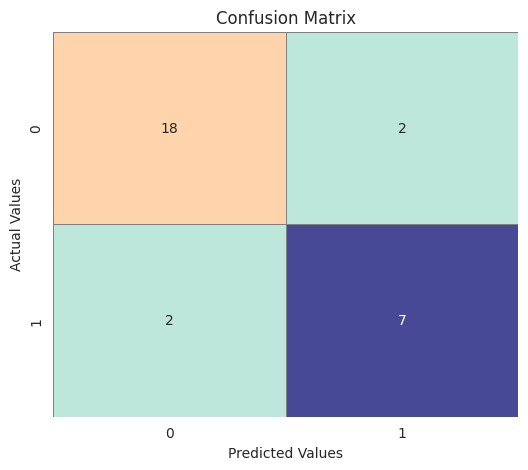

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot = True, fmt = 'g', cbar = False, cmap = 'icefire', linewidths= 0.5, linecolor= 'grey')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

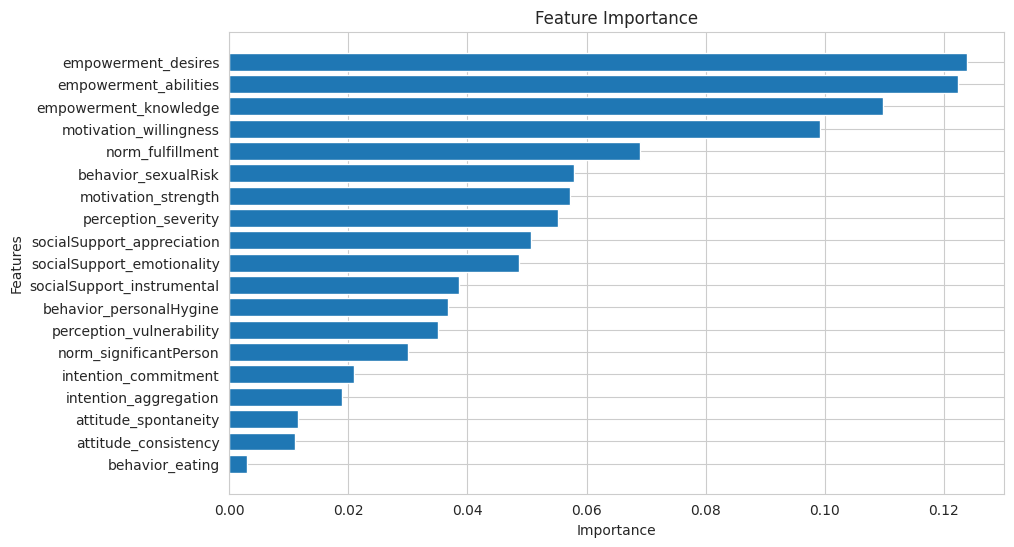

In [ ]:
# Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)  # Ascending order for reverse plotting

# Visualize Feature Importance
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), X.columns[indices])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Accuracy Model
accuracy = accuracy_score(y_test, predictions)*100
print(f"\nAccuracy Score: {round(accuracy, 2)} %")


Accuracy Score: 86.21 %
